In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/drive/MyDrive/Loan payments data.csv")

In [6]:
data.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [8]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [9]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [10]:
data.nunique()

Loan_ID           500
loan_status         3
Principal           6
terms               3
effective_date      7
due_date           25
paid_off_time     320
past_due_days      33
age                33
education           4
Gender              2
dtype: int64

In [11]:
data.paid_off_time=data.paid_off_time.fillna(1)

In [12]:
data.past_due_days=data.past_due_days.fillna(0)

In [13]:
data.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,0.0,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,0.0,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,0.0,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,0.0,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,0.0,26,college,male


In [14]:
data.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Principal,500.0,943.200,115.240274,300.0,1000.0,1000.0,1000.0,1000.0
terms,500.0,22.824,8.000064,7.0,15.0,30.0,30.0,30.0
past_due_days,500.0,14.404,25.614312,0.0,0.0,0.0,12.0,76.0
age,500.0,31.116,6.084784,18.0,27.0,30.0,35.0,51.0


In [29]:
a=data.loan_status.value_counts()
pd.DataFrame(a)

,loan_status
PAIDOFF,300
COLLECTION_PAIDOFF,100
COLLECTION,100


Text(0, 0.5, 'Count')

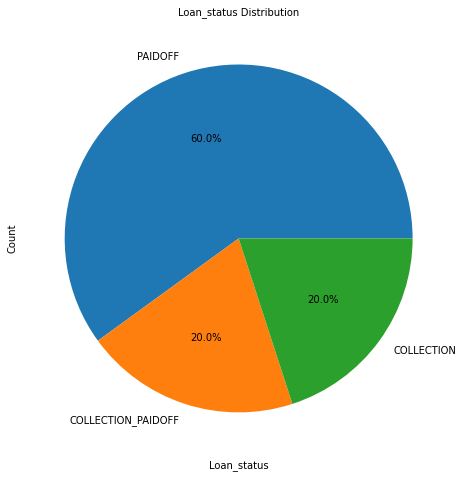

In [48]:
plt.figure(figsize=[10,8])
plt.pie(data.loan_status.value_counts(),labels=data['loan_status'].value_counts().index,autopct='%1.1f%%')
plt.title('Loan_status Distribution',fontsize=10)
plt.xlabel('Loan_status',fontsize=10)
plt.ylabel('Count',fontsize=10)

Observations:

 60% (300) people repaid the full amount of loan.

20% (100) people did not pay back and rest 20% (100) paid after due date.

In [18]:
a1=data.Principal.value_counts()
a1

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

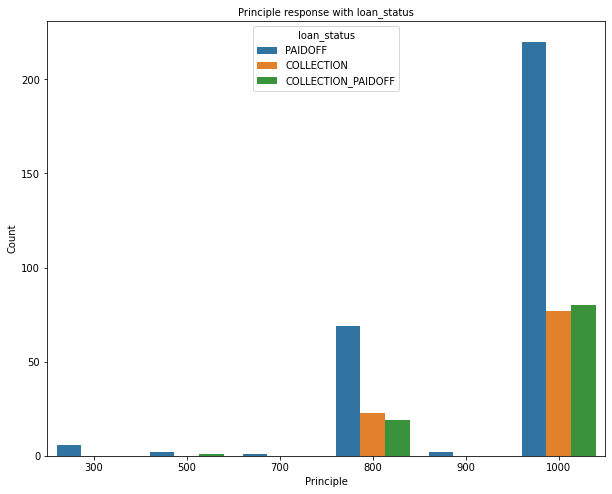

In [20]:
plt.figure(figsize=[10,8])
sns.countplot(data.Principal,hue=data.loan_status)
plt.title('Principle response with loan_status',fontsize=10)
plt.xlabel('Principle',fontsize=10)
plt.ylabel('Count',fontsize=10)

Observation:

Majority of the people have opted for Principal of 800 and 1000

In [21]:
a3=data.terms.value_counts()
pd.DataFrame(a3)

,terms
30,272
15,207
7,21


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

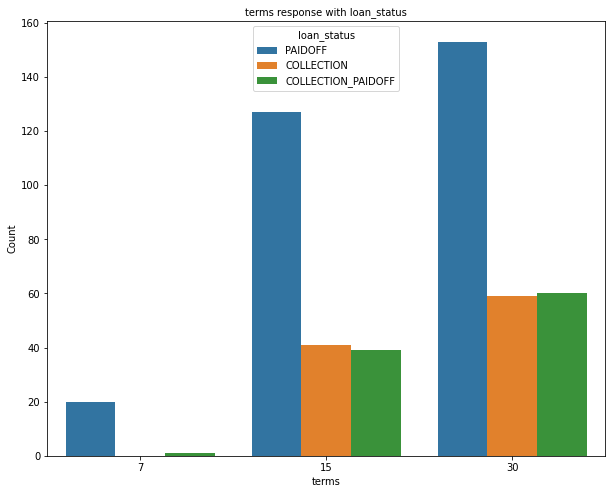

In [22]:
plt.figure(figsize=[10,8])
sns.countplot(data.terms,hue=data.loan_status)
plt.title('terms response with loan_status',fontsize=10)
plt.xlabel('terms',fontsize=10)
plt.ylabel('Count',fontsize=10)

Observation:
Only few people have opted loan for 7 days term

Majority of the late payments are from people who have their loan terms as 15 days and 30 days

In [23]:
a4=data.effective_date.value_counts()
pd.DataFrame(a4)

,effective_date
9/11/2016,231
9/12/2016,148
9/10/2016,46
9/14/2016,33
9/13/2016,23
9/9/2016,15
9/8/2016,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

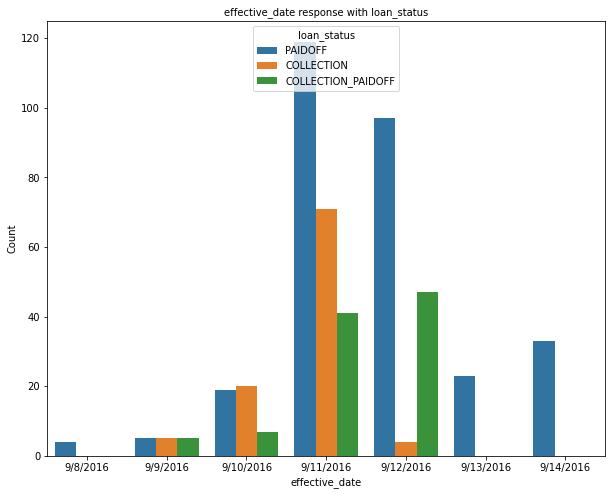

In [24]:
plt.figure(figsize=[10,8])
sns.countplot(data.effective_date,hue=data.loan_status)
plt.title('effective_date response with loan_status',fontsize=10)
plt.xlabel('effective_date',fontsize=10)
plt.ylabel('Count',fontsize=10)

On 11 and 12 September,2016 the loan was given to many people 

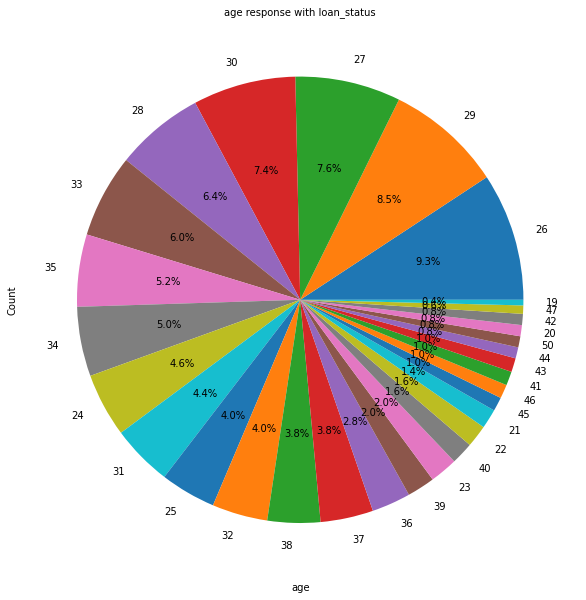

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


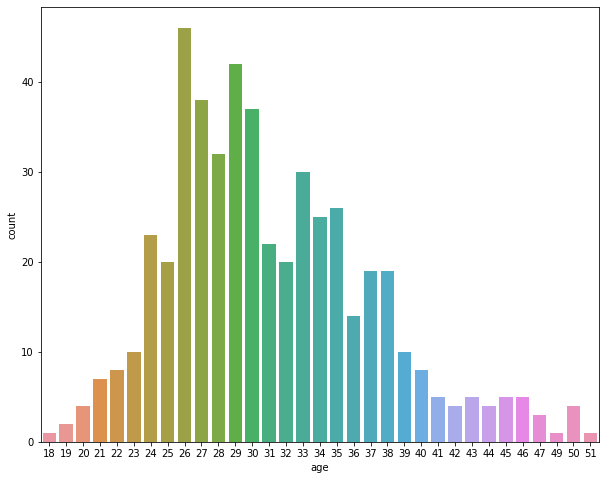

In [47]:
data.age.value_counts()
plt.figure(figsize=[10,20])
plt.pie(data.age.value_counts(),labels=data['age'].value_counts().index,autopct='%1.1f%%')
plt.title('age response with loan_status',fontsize=10)
plt.xlabel('age',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()
plt.figure(figsize=[10,8])
sns.countplot(data.age)

According to the observation , maximum amount of loan was given to the people of age 26 and then to the people of age 30

**Educatioanl Background of the people with respect to loan_Status**

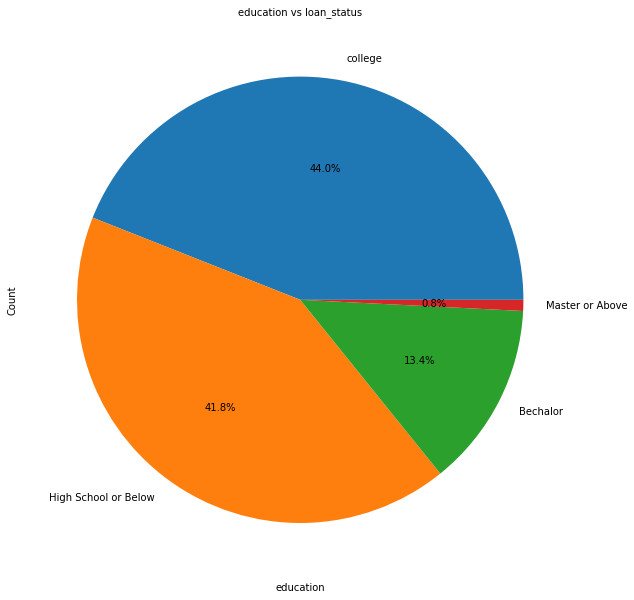

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


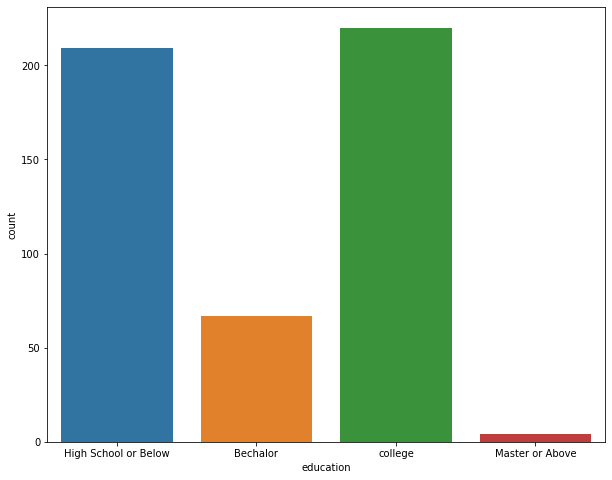

In [49]:
data.education.value_counts()
plt.figure(figsize=[10,20])
plt.pie(data.education.value_counts(),labels=data['education'].value_counts().index,autopct='%1.1f%%')
plt.title('education vs loan_status',fontsize=10)
plt.xlabel('education',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()
plt.figure(figsize=[10,8])
sns.countplot(data.education)

Most of the people are High School passed or below and very few peoples completed masters or above

**Gender vs Loan_status**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


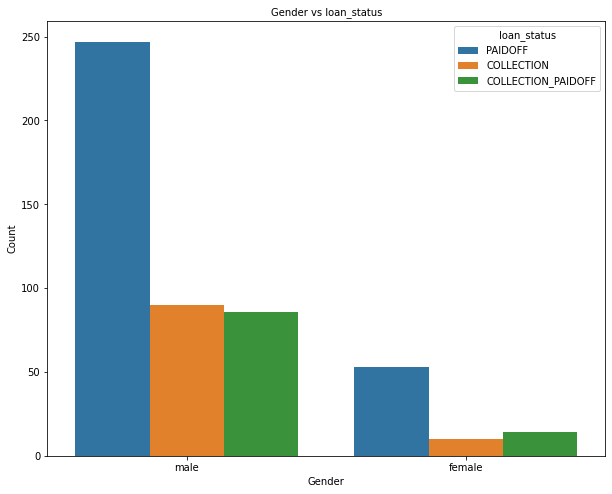

In [56]:
data.Gender.value_counts()
plt.figure(figsize=[10,8])
sns.countplot(data.Gender, hue=data.loan_status)
plt.title('Gender vs loan_status',fontsize=10)
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()


Male people are the most loan taker

**Correlation**

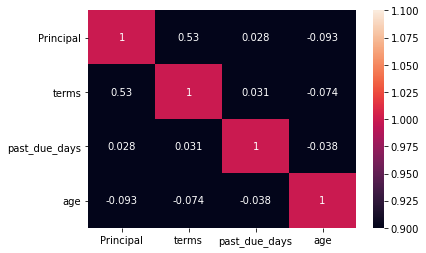

In [58]:
correlation = data[data.columns].corr()
sns.heatmap(correlation,vmin=1,vmax=1, annot=True)